# Feature Selection

This user guide details how DNAMite can be used for feature selection / feature-sparse prediction.

### Why Bother with Feature Selection?

When training a black-box machine learning model, it is common practice to use all available features even for high-dimensional datasets, as modern ML models can easily handle many features. When training a glass-box model, however, we need to care about both predictive performance as well as accurate and utility of explanations. While glass-box models often have good accurate on high-dimensional datasets, model explanations are much more likely to be impaired in such settings. In particular, when sets of correlated features are all used in the same dataset, additive models like DNAMite run into identifiability issues with how to spread contribution across the feature set.

### DNAMite Example

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from sklearn.model_selection import train_test_split
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

df_train = pd.read_csv("mortality_tab_train.csv")
X_train = df_train.drop(["target"], axis=1)
y_train = df_train["target"]

df_test = pd.read_csv("mortality_tab_test.csv")
X_test = df_test.drop(["target"], axis=1)
y_test = df_test["target"]

In [15]:
from dnamite.models import DNAMiteBinaryClassifier

model = DNAMiteBinaryClassifier(n_features=X_train.shape[1], device=device, fit_pairs=False)
model.fit(X_train, y_train)

Discretizing features...


100%|██████████| 714/714 [00:00<00:00, 1234.52it/s]


SPlIT 0
TRAINING MAINS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 1
TRAINING MAINS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 2
TRAINING MAINS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 3
TRAINING MAINS


Early stopping at 6 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 4
TRAINING MAINS


Early stopping at 7 epochs: Test loss has not improved for 5 consecutive epochs.


In [16]:
from sklearn.metrics import roc_auc_score
print("TEST AUC: ", roc_auc_score(y_test, model.predict_proba(X_test)))

TEST AUC:  0.8476356237177547


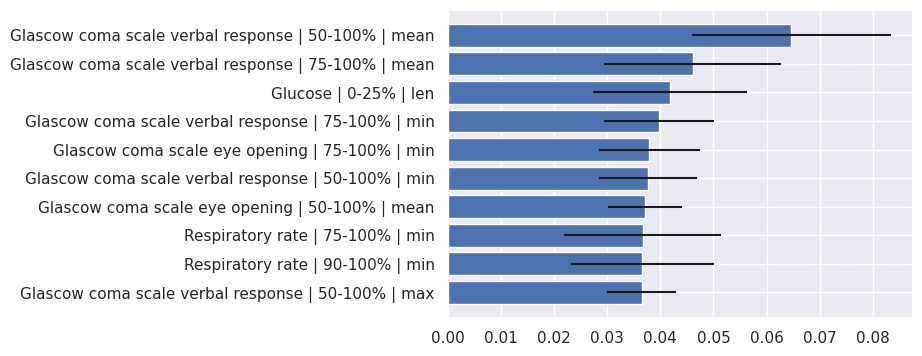

In [17]:
model.plot_feature_importances()

In [35]:
model_sparse = DNAMiteBinaryClassifier(
    n_features=X_train.shape[1], 
    device=device, 
    fit_pairs=False,
    reg_param=0.005,
    gamma=0.1
)
model_sparse.select_features(X_train, y_train)

Discretizing features...


100%|██████████| 714/714 [00:00<00:00, 1226.69it/s]


Epoch 1 | Train loss: 1.265 | Test loss: 0.606 | Active features: 714


Epoch 2 | Train loss: 0.431 | Test loss: 0.359 | Active features: 714


Epoch 3 | Train loss: 0.338 | Test loss: 0.338 | Active features: 370


Epoch 4 | Train loss: 0.325 | Test loss: 0.333 | Active features: 186


Epoch 5 | Train loss: 0.320 | Test loss: 0.332 | Active features: 84


Epoch 6 | Train loss: 0.316 | Test loss: 0.331 | Active features: 59


Epoch 7 | Train loss: 0.313 | Test loss: 0.328 | Active features: 43


Epoch 8 | Train loss: 0.311 | Test loss: 0.325 | Active features: 37


Epoch 9 | Train loss: 0.310 | Test loss: 0.326 | Active features: 32


Epoch 10 | Train loss: 0.307 | Test loss: 0.325 | Active features: 30


Epoch 11 | Train loss: 0.306 | Test loss: 0.324 | Active features: 29


Epoch 12 | Train loss: 0.305 | Test loss: 0.324 | Active features: 27


Epoch 13 | Train loss: 0.305 | Test loss: 0.323 | Active features: 25


Epoch 14 | Train loss: 0.304 | Test loss: 0.325 | Active features: 25


Epoch 15 | Train loss: 0.303 | Test loss: 0.323 | Active features: 24


Epoch 16 | Train loss: 0.304 | Test loss: 0.322 | Active features: 25


Epoch 17 | Train loss: 0.302 | Test loss: 0.322 | Active features: 24


Epoch 18 | Train loss: 0.302 | Test loss: 0.325 | Active features: 24


Epoch 19 | Train loss: 0.301 | Test loss: 0.324 | Active features: 24


Epoch 20 | Train loss: 0.300 | Test loss: 0.322 | Active features: 24


Epoch 21 | Train loss: 0.300 | Test loss: 0.323 | Active features: 24
Early stopping at 21 epochs: Test loss has not improved for 5 consecutive epochs.
Number of main features selected:  24


In [36]:
model_sparse.selected_feats

['Diastolic blood pressure | full | min',
 'Glascow coma scale eye opening | 50-100% | min',
 'Glascow coma scale eye opening | 50-100% | mean',
 'Glascow coma scale motor response | full | std',
 'Glascow coma scale motor response | 75-100% | max',
 'Glascow coma scale motor response | 90-100% | max',
 'Glascow coma scale verbal response | full | std',
 'Glascow coma scale verbal response | 50-100% | max',
 'Glascow coma scale verbal response | 75-100% | mean',
 'Glucose | 0-25% | len',
 'Glucose | 0-50% | mean',
 'Glucose | 75-100% | min',
 'Glucose | 90-100% | mean',
 'Mean blood pressure | full | mean',
 'Oxygen saturation | full | min',
 'Oxygen saturation | 75-100% | min',
 'Respiratory rate | 0-25% | mean',
 'Respiratory rate | 50-100% | min',
 'Systolic blood pressure | full | mean',
 'Systolic blood pressure | 75-100% | min',
 'Temperature | full | mean',
 'Temperature | 50-100% | mean',
 'Temperature | 75-100% | mean',
 'Temperature | 90-100% | min']

In [37]:
model_sparse.fit(X_train, y_train)

SPlIT 0
Found selected features. Using only those features.
TRAINING MAINS


Early stopping at 16 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 1
Found selected features. Using only those features.
TRAINING MAINS


Early stopping at 12 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 2
Found selected features. Using only those features.
TRAINING MAINS


Early stopping at 9 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 3
Found selected features. Using only those features.
TRAINING MAINS


Early stopping at 12 epochs: Test loss has not improved for 5 consecutive epochs.
SPlIT 4
Found selected features. Using only those features.
TRAINING MAINS


Early stopping at 11 epochs: Test loss has not improved for 5 consecutive epochs.


In [38]:
print("TEST AUC: ", roc_auc_score(y_test, model_sparse.predict_proba(X_test)))

Found selected features. Using only those features.


TEST AUC:  0.8126548503906994


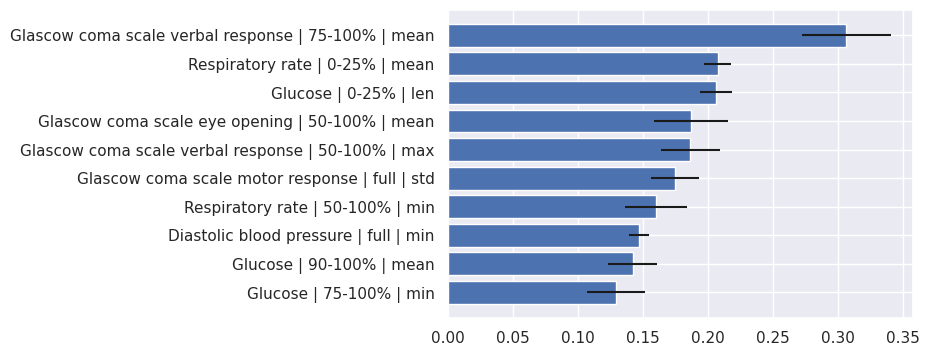

In [39]:
model_sparse.plot_feature_importances()

### Hyperparameters

DNAMite has multiple hyperparameters that can be set to control the 